In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV data
df = pd.read_csv('forecast_history.csv')
df

,Unnamed: 0,Median house price,Westpac: 4 year forecast,Joe Bloggs: 2 year forecast,Harry Spent: 5 year forecast
0,2011,340000,56%,23%,-20%
1,2012,370000,53%,34$,-80%
2,2013,350000,NaN,19%,-70%
3,2014,420000,13%,42%,-80%
4,2015,425000,33%,23%,-50%
5,2016,500000,-5%,15%,-90%
6,2017,520000,45%,1500%,-30%
7,2018,550000,34%,18%,NaN
8,2019,596000,34%,19%,-110%
9,2020,610000,20%,23%,-90%


In [45]:
# Change the first column name to 'year'
df.columns = ['year'] + list(df.columns[1:])
# Forward fill, fill the NaN with previous data
df = df.ffill()
df

,year,Median house price,Westpac: 4 year forecast,Joe Bloggs: 2 year forecast,Harry Spent: 5 year forecast
0,2011,340000,56%,23%,-20%
1,2012,370000,53%,34$,-80%
2,2013,350000,53%,19%,-70%
3,2014,420000,13%,42%,-80%
4,2015,425000,33%,23%,-50%
5,2016,500000,-5%,15%,-90%
6,2017,520000,45%,1500%,-30%
7,2018,550000,34%,18%,-30%
8,2019,596000,34%,19%,-110%
9,2020,610000,20%,23%,-90%


In [46]:
# Take a look at all column data types
df.dtypes

year                             int64
Median house price              object
Westpac: 4 year forecast        object
Joe Bloggs: 2 year forecast     object
Harry Spent: 5 year forecast    object
dtype: object

- Replace string error then convert then remove them
- Change the value from the second columns to number

In [47]:
# Convert columns to numeric, handling errors
df['Median house price'] = pd.to_numeric(df['Median house price'].replace('[\$,O]', '', regex=True), errors='coerce')

# Convert forecast percentages to numeric
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col].str.rstrip('%'), errors='coerce') / 100

We'll determine the best forecaster using MSE score, which measure the mean square error. Lower MSE means that the forecaster is better.

In [48]:
# Define forecasters and their time spans
forecasters = {
    'Westpac': ('Westpac: 4 year forecast', 4),
    'Joe Bloggs': ('Joe Bloggs: 2 year forecast', 2),
    'Harry Spent': ('Harry Spent: 5 year forecast', 5)
}

# Calculate predicted prices
for name, (col, years) in forecasters.items():
    df[f'{name} Predicted'] = df['Median house price'] * (1 + df[col]) ** (1/years)

# Calculate MSE for each forecaster
mse_scores = {}
for name, (_, years) in forecasters.items():
    shifted_actual = df['Median house price'].shift(-years)
    mse = np.mean((shifted_actual - df[f'{name} Predicted'])**2)
    mse_scores[name] = mse

# Print MSE scores
print("MSE Scores:")
for name, score in mse_scores.items():
    print(f"{name}: {score:.2f}")

# Identify the best forecaster
best_forecaster = min(mse_scores, key=mse_scores.get)
print(f"\nBest forecaster: {best_forecaster} with MSE of {mse_scores[best_forecaster]:.2f}")


MSE Scores:
Westpac: 73734518662.70
Joe Bloggs: 277872463855.34
Harry Spent: 84915795916.02

Best forecaster: Westpac with MSE of 73734518662.70


Generate a plot for visualization

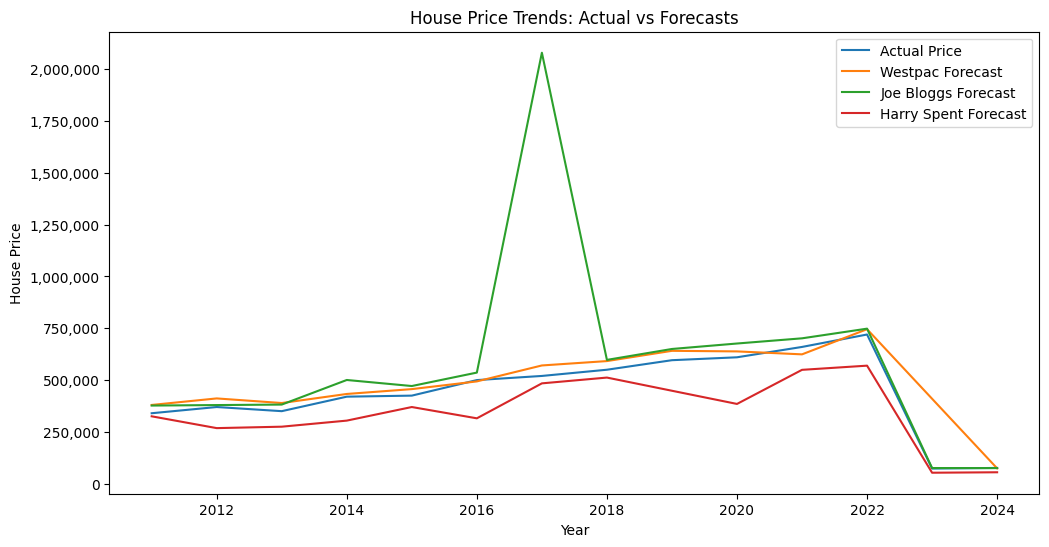

In [49]:
# Create the plot
plt.figure(figsize=(12, 6))

# Plot actual price
sns.lineplot(data=df, x='year', y='Median house price', label='Actual Price')

# Plot forecasts
for name in forecasters.keys():
    sns.lineplot(data=df, x='year', y=f'{name} Predicted', label=f'{name} Forecast')

plt.title('House Price Trends: Actual vs Forecasts')
plt.xlabel('Year')
plt.ylabel('House Price')
plt.legend()

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()